In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt

sys.path.append("..")
from hnx.core.hypergraph import Hypergraph
from hnx.generation import random_hypergraph
from hnx.dynamics.contagion import simplicial_contagion

np.random.seed(123)

In [16]:
N = 2000
E2 = N*10
E3 = N*2
hypergraph = random_hypergraph(N, {2 : E2, 3: E3})

In [23]:
mu = 0.05
beta = 0.75*mu/20
beta_D = 2.5*mu/6

I_0 = 1*(np.random.random(N)<0.8)
T = 500

rho_t_simplicial = simplicial_contagion(hypergraph, I_0, T, beta, beta_D, mu)
rho_t_simple = simplicial_contagion(hypergraph, I_0, T, beta, 0, mu)

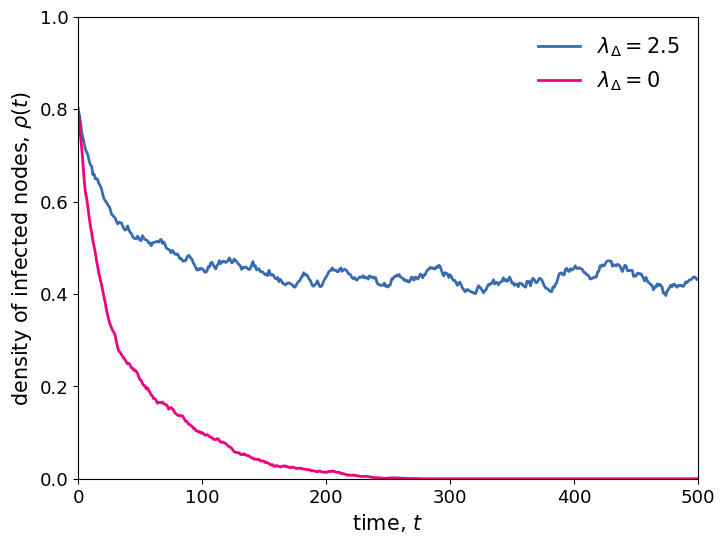

In [42]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(range(T),rho_t_simplicial, 
        lw=2, c=plt.cm.Accent(4),
        label="$\lambda_\Delta = 2.5$")
ax.plot(range(T),rho_t_simple, 
        lw=2, c=plt.cm.Accent(5),
        label="$\lambda_\Delta = 0$")

ax.set_xlim(0,500)
ax.set_ylim(0,1)
ax.tick_params(axis='both', which='major', labelsize=13)

ax.set_xlabel("time, $t$", fontsize=15)
ax.set_ylabel("density of infected nodes, $\\rho(t)$", fontsize=15)
ax.legend(fontsize=15, frameon=False)

plt.show()